In [3]:
def SA_is_alternating_path(n,edges,matching,pairs): # pairs is a list of edges, is it an alternating path?
    def edge_equal(edge1,edge2):
        if edge1 == edge2:
            return True
        else:
            (a,b) = edge1
            return (b,a) == edge2    
    
    def find_edge(edge,edges):
        # find the first edge in edges edge_equal to the given edge
        #  or None if there isn't one
        return next((edge2 for edge2 in edges if edge_equal(edge,edge2)),None)
    

    def are_edges_incident(edge1,edge2):
        (a,b) = edge1
        return a in edge2 or b in edge2
    
    def is_path(n,edges,path): # is path a valid path? 
        # i.e., is every element of path an edge in the sense of edge_equal ?
        # and are consecutive edges adjacent ?
        for pair in path:
            if not next((edge for edge in edges if edge_equal(edge,pair)),False):
                return False
        for i in range(len(path)-1):
            if not are_edges_incident(path[i],path[i+1]):
                return False
        return True

    if pairs == []:
        return True # TODO, not sure whether this is correct
    if not is_path(n,edges,pairs):
        return False
    expected_parity = find_edge(pairs[0], matching) != None
    for pair in pairs:
        parity = find_edge(pair,matching) != None
        if parity != expected_parity:
            return False
        expected_parity = not parity
    return True

def SA_is_augmenting_path(n,edges,matching,path):
    # path is a list of verticies
    # matching is a list of edges, in the sense of edge_equal

    def path_to_pairs(path): # return a list of pairs of points, presumably edges
        def loop(i,pairs):
            if i == len(path)-1:
                return pairs
            else:
                return loop(i+1,pairs + [(path[i],path[i+1])])
        return loop(0,[])

    def is_free_vertex(n,matching,v):
        # we assume that matching is a valid matching (without verifying)
        #  is v a vertex of the graph which is not adjacent to any edge in the matching
        if v < 0:
            return False
        if v >= n:
            return False
        for (a,b) in matching:
            if a == v or b == v:
                return False
        return True

    if len(path) % 2 == 1:
        return False
    if path == []:
        return False
    return is_free_vertex(n,matching,path[0]) \
            and is_free_vertex(n,matching,path[len(path)-1]) \
            and SA_is_alternating_path(n,edges,matching,path_to_pairs(path))


# Enter the values of function parameters

In [20]:
par=[3,[(0,1),(1,2),(2,3),(3,1),(3,2)],[(2,1)],[(3,1)]]


True

# Showing the graph 

In [21]:
p=SA_is_alternating_path(par[0],par[1],par[2],par[3])
p

True

In [15]:
#par = SA_is_alternating_path(3,[(0,1),(2,1),(0,2)],[(2,1)],[(2,1)])


#p=SA_is_alternating_path(par[0],par[1],par[2],par[3])
#par

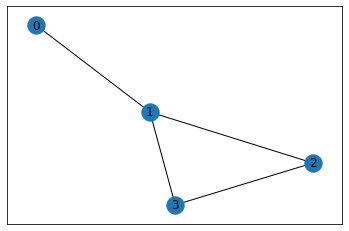

In [19]:
# First networkx library is imported
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt


# Defining a Class
class GraphVisualization:

	def __init__(self):
		
		# visual is a list which stores all
		# the set of edges that constitutes a
		# graph
		self.visual = []
		
	# addEdge function inputs the vertices of an
	# edge and appends it to the visual list
	def addEdge(self, a, b):
		temp = [a, b]
		self.visual.append(temp)
		
	# In visualize function G is an object of
	# class Graph given by networkx G.add_edges_from(visual)
	# creates a graph with a given list
	# nx.draw_networkx(G) - plots the graph
	# plt.show() - displays the graph
	def visualize(self):
		G = nx.Graph()
		G.add_edges_from(self.visual)
		nx.draw_networkx(G)
		plt.show()

# Driver code
G = GraphVisualization()
i=par[1]
for j in i:
    a=j[0]
    b=j[1]
    G.addEdge(a, b)
   
    


G.visualize()
